In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

C:\Users\itani\AppData\Local\Temp\ipykernel_38072\2023270461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = metadata['type'].map(lambda x: 'healthy' if x == 'normal' else x)


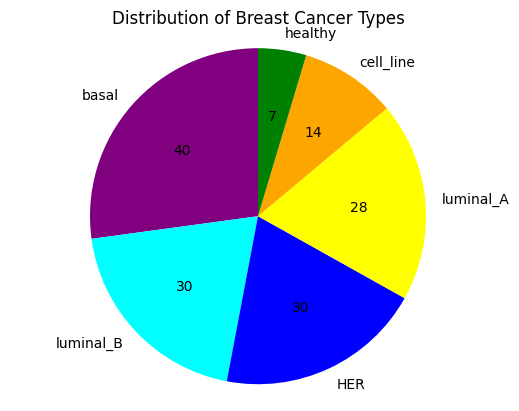

In [319]:
raw_data = pd.read_csv("Breast_GSE45827.csv")
metadata = raw_data[['samples', 'type']]
metadata['type'] = metadata['type'].map(lambda x: 'healthy' if x == 'normal' else x)
# Assuming 'metadata' is your DataFrame and it has a 'type' column
type_counts = metadata['type'].value_counts()  # This will count the occurrences of each label

# Define your color map
color_map = {
    'healthy': 'green',
    'basal': 'purple',
    'luminal_A': 'yellow',
    'luminal_B': 'cyan',
    'HER': 'blue',
    'cell_line': 'orange'
}

# Match the colors to the types in the 'type' column
colors = [color_map.get(t, 'gray') for t in type_counts.index]  # Default to 'gray' if a type is not in the map

# Create a pie chart with counts instead of percentages, and apply custom colors
plt.pie(type_counts, labels=type_counts.index, autopct=lambda p: f'{int(p * sum(type_counts) / 100)}',
        startangle=90, colors=colors)
plt.title('Distribution of Breast Cancer Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()



In [288]:

metadata

,samples,type,color
0,84,basal,purple
1,85,basal,purple
2,87,basal,purple
3,90,basal,purple
4,91,basal,purple
...,...,...,...
146,230,luminal_B,cyan
147,233,luminal_B,cyan
148,236,luminal_B,cyan
149,237,luminal_B,cyan


In [289]:
metadata
raw_data.drop(['samples', 'type'], axis = 1, inplace = True)

In [290]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(raw_data)


C:\Users\itani\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [291]:
centroids = kmeans.cluster_centers_
data_for_pca = raw_data
data_for_pca.columns = range(data_for_pca.shape[1])

In [292]:
type_means = pd.concat([raw_data, metadata['type']], axis=1).groupby('type').mean()

In [293]:
type_means.columns = range(type_means.shape[1])

In [294]:
data_with_centroids = pd.concat([data_for_pca,pd.DataFrame(centroids), type_means],axis = 0)

In [295]:
data_with_centroids.fillna(0, inplace=True)

In [296]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_with_centroids)
pca = PCA(n_components=2)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

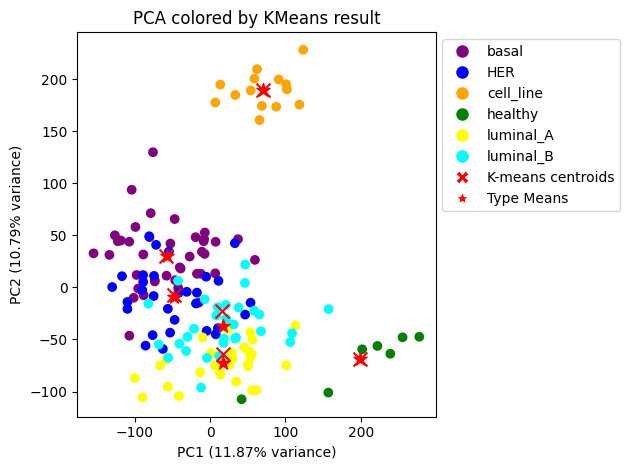

In [297]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

pca_df = pd.DataFrame(pca_result[:-12], columns=['PC1', 'PC2'])
scatter_samples = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=metadata['color'], marker='o', label='Samples')

# Plot the centroids with red 'x' markers
centroids_Df = pd.DataFrame(pca_result[-12:-6], columns=['PC1', 'PC2'])
scatter_centroids = plt.scatter(centroids_Df['PC1'], centroids_Df['PC2'], c='red', marker='x', s=100, label='K-means Centroids')  # Set marker size

# Plot the real type means
real_means_df = pd.DataFrame(pca_result[-6:], columns=['PC1', 'PC2'])
plt.scatter(real_means_df['PC1'], real_means_df['PC2'], c='red', marker='*', s=100, label='Type Means')

# Set the labels for the axes with explained variance
plt.title('PCA colored by KMeans result')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')

# Add a custom legend for the sample types
unique_types = metadata['type'].unique()
custom_legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sample_type)
                          for sample_type, color in zip(unique_types, metadata['color'].unique())]

# Create custom legend for centroids 'x' markers
centroid_legend = Line2D([0], [0], marker='X', color='w', markerfacecolor= 'red', markersize=10, label='K-means centroids')


# Create custom legend for type means '*'
means_legend = Line2D([0], [], marker='*', color='w', markerfacecolor= 'red', markersize=10, label='Type Means')

# Combine the sample types legend and the centroids legend
plt.legend(handles=custom_legend_elements + [centroid_legend] + [means_legend], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# Show the plot
plt.savefig('PCA_colored_as_k_means_clusters.png')

In [298]:
metadata['kmeans_label'] = kmeans.labels_

C:\Users\itani\AppData\Local\Temp\ipykernel_38072\1349196591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['kmeans_label'] = kmeans.labels_


In [299]:
metadata

,samples,type,color,kmeans_label
0,84,basal,purple,1
1,85,basal,purple,1
2,87,basal,purple,1
3,90,basal,purple,1
4,91,basal,purple,1
...,...,...,...,...
146,230,luminal_B,cyan,2
147,233,luminal_B,cyan,2
148,236,luminal_B,cyan,2
149,237,luminal_B,cyan,3


FileNotFoundError: [Errno 2] No such file or directory: './pie_charts/pie_chart_HER.png'

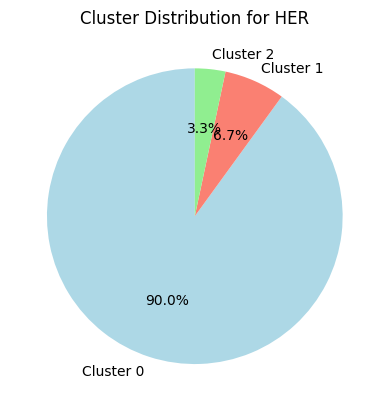

In [300]:
for type in np.unique(metadata['type']):
    import matplotlib.pyplot as plt
import numpy as np

# Define a fixed set of colors for each cluster (assuming you have 2 clusters)
cluster_colors = cluster_colors = {
    0: 'lightblue',  # Cluster 0
    1: 'salmon',     # Cluster 1
    2: 'lightgreen', # Cluster 2
    3: 'orange',     # Cluster 3
    4: 'purple',     # Cluster 4
    5: 'yellow',     # Cluster 5
}  # Update this based on the number of clusters

# Loop through each unique 'type'
for type in np.unique(metadata['type']):
    # Select the subset of data for this type
    cluster_data = metadata[metadata['type'] == type]

    # Count the occurrences of each KMeans cluster label within this type
    cluster_counts = cluster_data['kmeans_label'].value_counts()

    # Map the cluster labels to their corresponding colors
    colors = [cluster_colors[label] for label in cluster_counts.index]

    pie_chart_labels = [f"Cluster {cluster}" for cluster in cluster_counts.index]
    # Create a pie chart for the distribution of KMeans clusters
    plt.pie(cluster_counts, labels=pie_chart_labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Cluster Distribution for {type}")

    plt.savefig(f"./pie_charts/pie_chart_{type}.png")

    # Clear the figure to avoid overlap between charts
    plt.clf()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the fixed colors for each type (example: 6 types)
type_colors = {
    'healthy': 'green',
    'basal': 'purple',
    'luminal_A': 'yellow',
    'luminal_B': 'cyan',
    'HER': 'blue',
    'cell_line': 'orange'
}

# Function to calculate Gini Impurity
def gini_impurity(counts):
    total = sum(counts)
    if total == 0:
        return 0
    proportions = np.array(counts) / total
    return 1 - np.sum(proportions**2)

# Function to format percentages and hide 0% labels
def remove_zero_percentages(pct, allvalues):
    return f'{pct:.1f}%' if pct > 0 else ''  # Only show percentage if > 0%

# Set up a 2x3 grid for the pie charts (6 pie charts)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each unique KMeans cluster (assuming kmeans_label column exists)
for i, cluster_label in enumerate(np.unique(metadata['kmeans_label'])):
    # Select the subset of data for this cluster
    cluster_data = metadata[metadata['kmeans_label'] == cluster_label]

    # Count the occurrences of each 'type' within the current cluster
    type_counts = cluster_data['type'].value_counts()

    # Ensure that all types are represented, even those with a count of 0
    full_type_counts = {type_: 0 for type_ in type_colors}  # Initialize all types with 0
    full_type_counts.update(type_counts.to_dict())  # Update with actual counts

    # Sort types based on the predefined order (to keep colors consistent)
    sorted_types = list(type_colors.keys())
    sorted_counts = [full_type_counts[type_] for type_ in sorted_types]
    chart_colors = [type_colors[type_] for type_ in sorted_types]

    # Calculate Gini impurity for this cluster
    gini = gini_impurity(sorted_counts)

    # Create a pie chart for the distribution of 'type' within this cluster
    axes[i].pie(sorted_counts, autopct=lambda pct: remove_zero_percentages(pct, sorted_counts),
                startangle=90, colors=chart_colors)
    axes[i].set_title(f"Cluster {cluster_label} - Gini: {gini:.3f}")

# Create a single legend for all pie charts outside the plot
fig.legend(labels=type_colors.keys(), loc='upper right', title="Type", fontsize=12)

# Adjust layout to avoid overlapping text and ensure proper spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("pie_charts_combined_with_gini.png", bbox_inches='tight')

# Show the figure (optional)
plt.show()


In [ ]:
raw_data = pd.read_csv("Breast_GSE45827.csv")
top_50_genes = pd.read_csv('top_50_genes.csv')
top_50_genes_data = raw_data[top_50_genes['Gene']]
top_50_genes_data

In [ ]:
top50_kmeans = KMeans(n_clusters=6)
top50_kmeans.fit(top_50_genes_data)


In [ ]:
top50_centroids = top50_kmeans.cluster_centers_
top50_data_for_pca = top_50_genes_data
top50_data_for_pca.columns = range(top50_data_for_pca.shape[1])
top50_type_means = pd.concat([top_50_genes_data, metadata['type']], axis= 1).groupby('type').mean()
top50_type_means.columns = range(top50_type_means.shape[1])
top50_data_with_centroids = pd.concat([top50_data_for_pca, pd.DataFrame(top50_centroids),top50_type_means], axis=0)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(top50_data_with_centroids)
pca = PCA(n_components=2)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

pca_df = pd.DataFrame(pca_result[:-12], columns=['PC1', 'PC2'])
scatter_samples = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=metadata['color'], marker='o', label='Samples')

# Plot the centroids with red 'x' markers
centroids_Df = pd.DataFrame(pca_result[-12:-6], columns=['PC1', 'PC2'])
scatter_centroids = plt.scatter(centroids_Df['PC1'], centroids_Df['PC2'], c='red', marker='x', s=100, label='K-means Centroids')  # Set marker size

# Plot the real type means
real_means_df = pd.DataFrame(pca_result[-6:], columns=['PC1', 'PC2'])
plt.scatter(real_means_df['PC1'], real_means_df['PC2'], c='red', marker='*', s=100, label='Type Means')

# Set the labels for the axes with explained variance
plt.title('Top50 PCA colored by KMeans result')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')

# Add a custom legend for the sample types
unique_types = metadata['type'].unique()
custom_legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sample_type)
                          for sample_type, color in zip(unique_types, metadata['color'].unique())]

# Create custom legend for centroids 'x' markers
centroid_legend = Line2D([0], [0], marker='X', color='w', markerfacecolor= 'red', markersize=10, label='K-means centroids')


# Create custom legend for type means '*'
means_legend = Line2D([0], [], marker='*', color='w', markerfacecolor= 'red', markersize=10, label='Type Means')

# Combine the sample types legend and the centroids legend
plt.legend(handles=custom_legend_elements + [centroid_legend] + [means_legend], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# Show the plot
plt.savefig('top50_PCA_colored_as_k_means_clusters.png')

C:\Users\itani\AppData\Local\Temp\ipykernel_38072\3064120912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['top50_kmeans'] = top50_kmeans.labels_


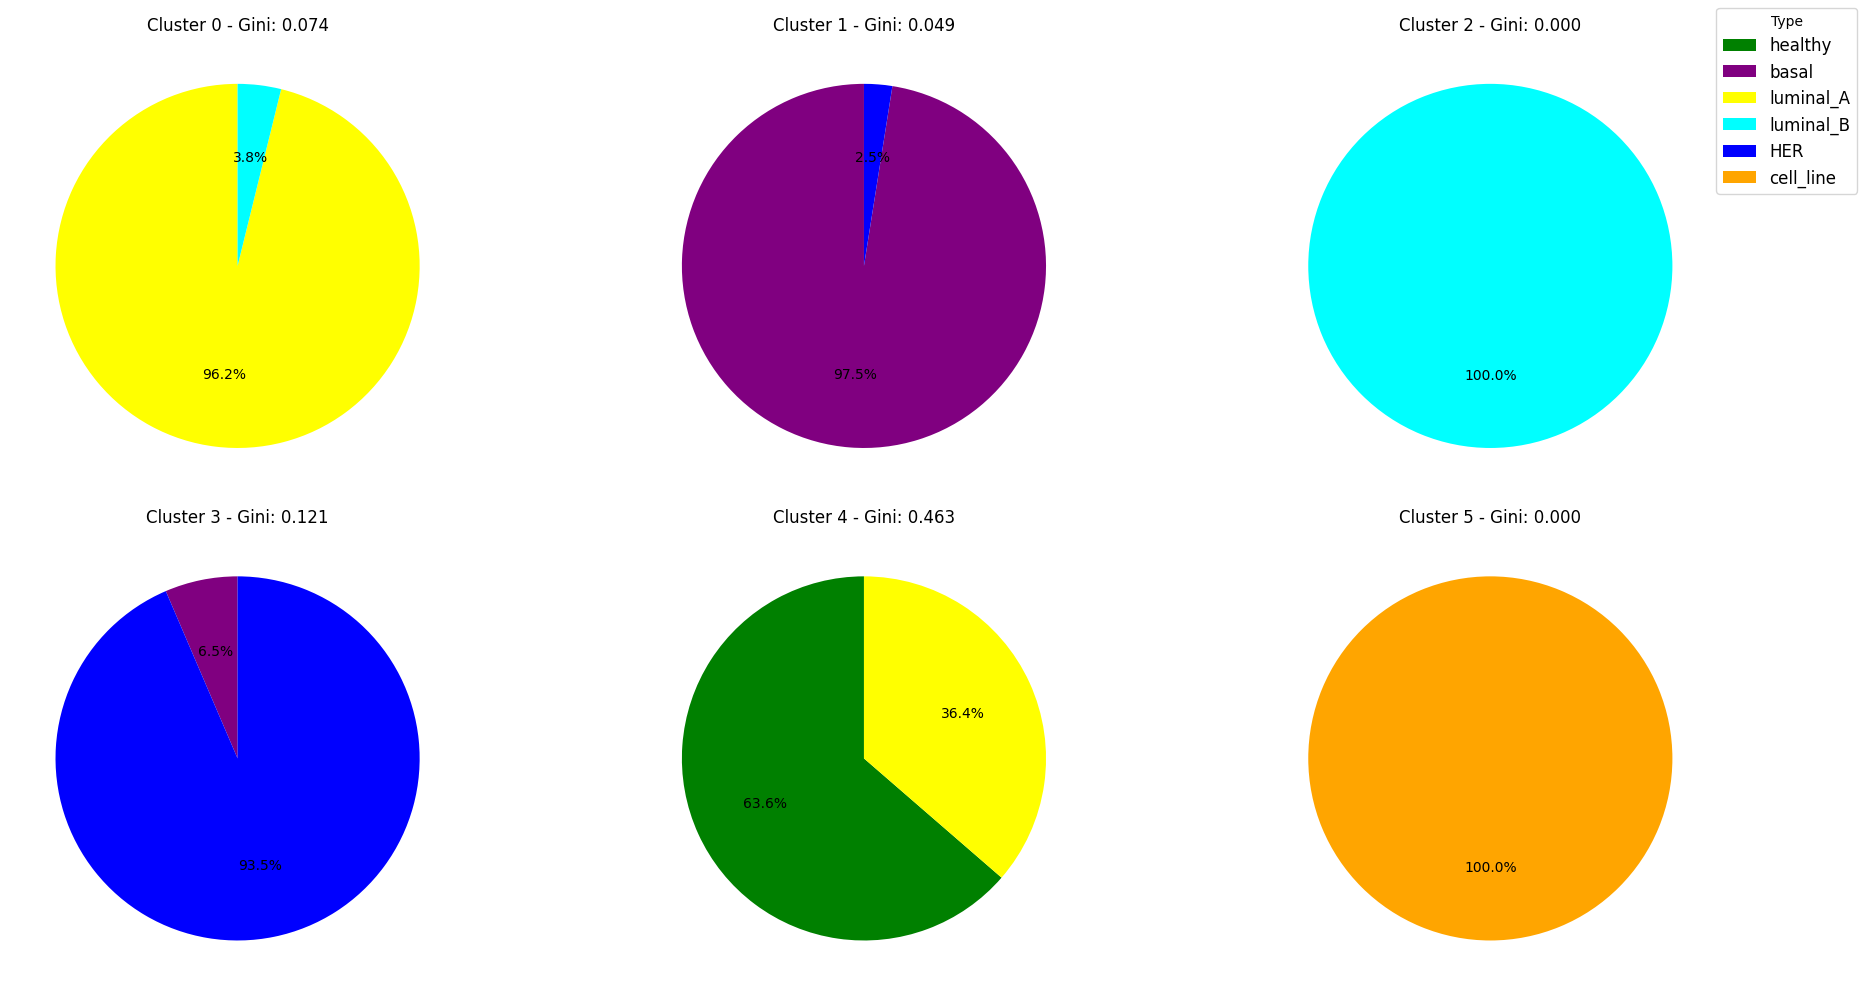

In [310]:
import matplotlib.pyplot as plt
import numpy as np

metadata['top50_kmeans'] = top50_kmeans.labels_

# Define the fixed colors for each type (example: 6 types)
type_colors = {
    'healthy': 'green',
    'basal': 'purple',
    'luminal_A': 'yellow',
    'luminal_B': 'cyan',
    'HER': 'blue',
    'cell_line': 'orange'
}

# Function to calculate Gini Impurity
def gini_impurity(counts):
    total = sum(counts)
    if total == 0:
        return 0
    proportions = np.array(counts) / total
    return 1 - np.sum(proportions**2)

# Function to format percentages and hide 0% labels
def remove_zero_percentages(pct, allvalues):
    return f'{pct:.1f}%' if pct > 0 else ''  # Only show percentage if > 0%

# Set up a 2x3 grid for the pie charts (6 pie charts)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each unique KMeans cluster (assuming top50_kmeans column exists)
for i, cluster_label in enumerate(np.unique(metadata['top50_kmeans'])):
    # Select the subset of data for this cluster
    cluster_data = metadata[metadata['top50_kmeans'] == cluster_label]

    # Count the occurrences of each 'type' within the current cluster
    type_counts = cluster_data['type'].value_counts()

    # Ensure that all types are represented, even those with a count of 0
    full_type_counts = {type_: 0 for type_ in type_colors}  # Initialize all types with 0
    full_type_counts.update(type_counts.to_dict())  # Update with actual counts

    # Sort types based on the predefined order (to keep colors consistent)
    sorted_types = list(type_colors.keys())
    sorted_counts = [full_type_counts[type_] for type_ in sorted_types]
    chart_colors = [type_colors[type_] for type_ in sorted_types]

    # Calculate Gini impurity for this cluster
    gini = gini_impurity(sorted_counts)

    # Create a pie chart for the distribution of 'type' within this cluster
    axes[i].pie(sorted_counts,
                autopct=lambda pct: remove_zero_percentages(pct, sorted_counts),
                startangle=90, colors=chart_colors)
    axes[i].set_title(f"Cluster {cluster_label} - Gini: {gini:.3f}")

# Create a single legend for all pie charts outside the plot
fig.legend(labels=type_colors.keys(), loc='upper right', title="Type", fontsize=12)

# Adjust layout to avoid overlapping text and ensure proper spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("top50_kmeans_pie_charts_combined_with_gini.png", bbox_inches='tight')

# Show the figure (optional)
plt.show()


In [311]:
top_10_genes = top_50_genes.iloc[:10,:]
raw_data = pd.read_csv("Breast_GSE45827.csv")
top_10_genes_data = raw_data[top_10_genes['Gene']]
top_10_genes_data

,204092_s_at,AFFX-DapX-3_at,203071_at,222336_at,218423_x_at,AFFX-r2-P1-cre-5_at,216623_x_at,222457_s_at,201710_at,221213_s_at
0,8.712403,8.070519,5.185523,3.853700,8.609044,13.477698,2.747062,6.238587,8.132094,6.462011
1,8.247459,8.601147,5.685386,4.501595,8.582696,13.470146,4.752074,6.582404,7.964867,7.117842
2,9.581170,8.316812,5.569915,3.824040,8.101111,13.295080,2.693816,5.928012,7.986783,6.400085
3,8.334504,8.445204,5.976966,4.488675,8.928016,13.508861,2.638481,7.023352,7.270227,6.950866
4,8.472328,8.355504,5.930642,4.258718,8.379370,13.542206,2.740991,6.786424,8.002769,6.740786
...,...,...,...,...,...,...,...,...,...,...
146,7.867655,10.526453,7.810213,6.176343,7.331162,14.133976,5.966605,8.869183,7.591871,6.549706
147,7.937046,10.306962,7.918662,5.653151,7.706603,14.070989,8.926689,9.103992,8.607763,6.824102
148,7.967044,10.372013,6.558610,4.364668,8.089297,13.977076,7.468360,7.944844,7.605247,6.473399
149,7.695396,10.141623,6.698452,5.743040,7.609173,13.943521,9.118251,8.990227,6.369973,6.905198


In [312]:
top10_kmeans = KMeans(n_clusters=6)
top10_kmeans.fit(top_10_genes_data)


C:\Users\itani\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [313]:
top10_centroids = top10_kmeans.cluster_centers_
top10_data_for_pca = top_10_genes_data
top10_data_for_pca.columns = range(top10_data_for_pca.shape[1])
top10_type_means = pd.concat([top_10_genes_data, metadata['type']], axis= 1).groupby('type').mean()
top10_type_means.columns = range(top10_type_means.shape[1])
top10_data_with_centroids = pd.concat([top10_data_for_pca, pd.DataFrame(top10_centroids),top10_type_means], axis=0)

In [314]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(top10_data_with_centroids)
pca = PCA(n_components=2)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

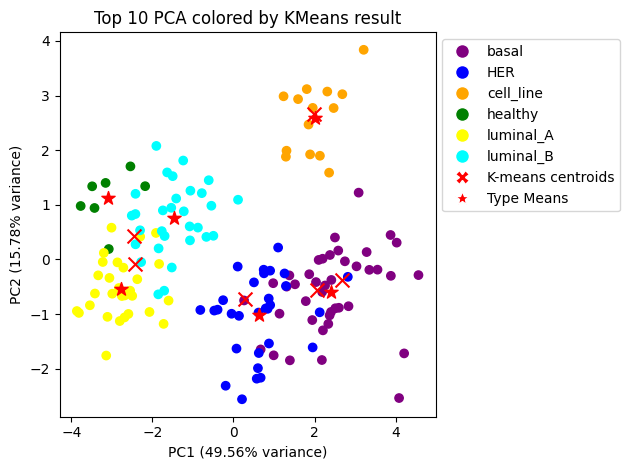

In [317]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

pca_df = pd.DataFrame(pca_result[:-12], columns=['PC1', 'PC2'])
scatter_samples = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=metadata['color'], marker='o', label='Samples')

# Plot the centroids with red 'x' markers
centroids_Df = pd.DataFrame(pca_result[-12:-6], columns=['PC1', 'PC2'])
scatter_centroids = plt.scatter(centroids_Df['PC1'], centroids_Df['PC2'], c='red', marker='x', s=100, label='K-means Centroids')  # Set marker size

# Plot the real type means
real_means_df = pd.DataFrame(pca_result[-6:], columns=['PC1', 'PC2'])
plt.scatter(real_means_df['PC1'], real_means_df['PC2'], c='red', marker='*', s=100, label='Type Means')

# Set the labels for the axes with explained variance
plt.title('Top 10 PCA colored by KMeans result')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')

# Add a custom legend for the sample types
unique_types = metadata['type'].unique()
custom_legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sample_type)
                          for sample_type, color in zip(unique_types, metadata['color'].unique())]

# Create custom legend for centroids 'x' markers
centroid_legend = Line2D([0], [0], marker='X', color='w', markerfacecolor= 'red', markersize=10, label='K-means centroids')


# Create custom legend for type means '*'
means_legend = Line2D([0], [], marker='*', color='w', markerfacecolor= 'red', markersize=10, label='Type Means')

# Combine the sample types legend and the centroids legend
plt.legend(handles=custom_legend_elements + [centroid_legend] + [means_legend], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# Show the plot
plt.savefig('top10_PCA_colored_as_k_means_clusters.png')

C:\Users\itani\AppData\Local\Temp\ipykernel_38072\2197663764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['top10_kmeans'] = top10_kmeans.labels_


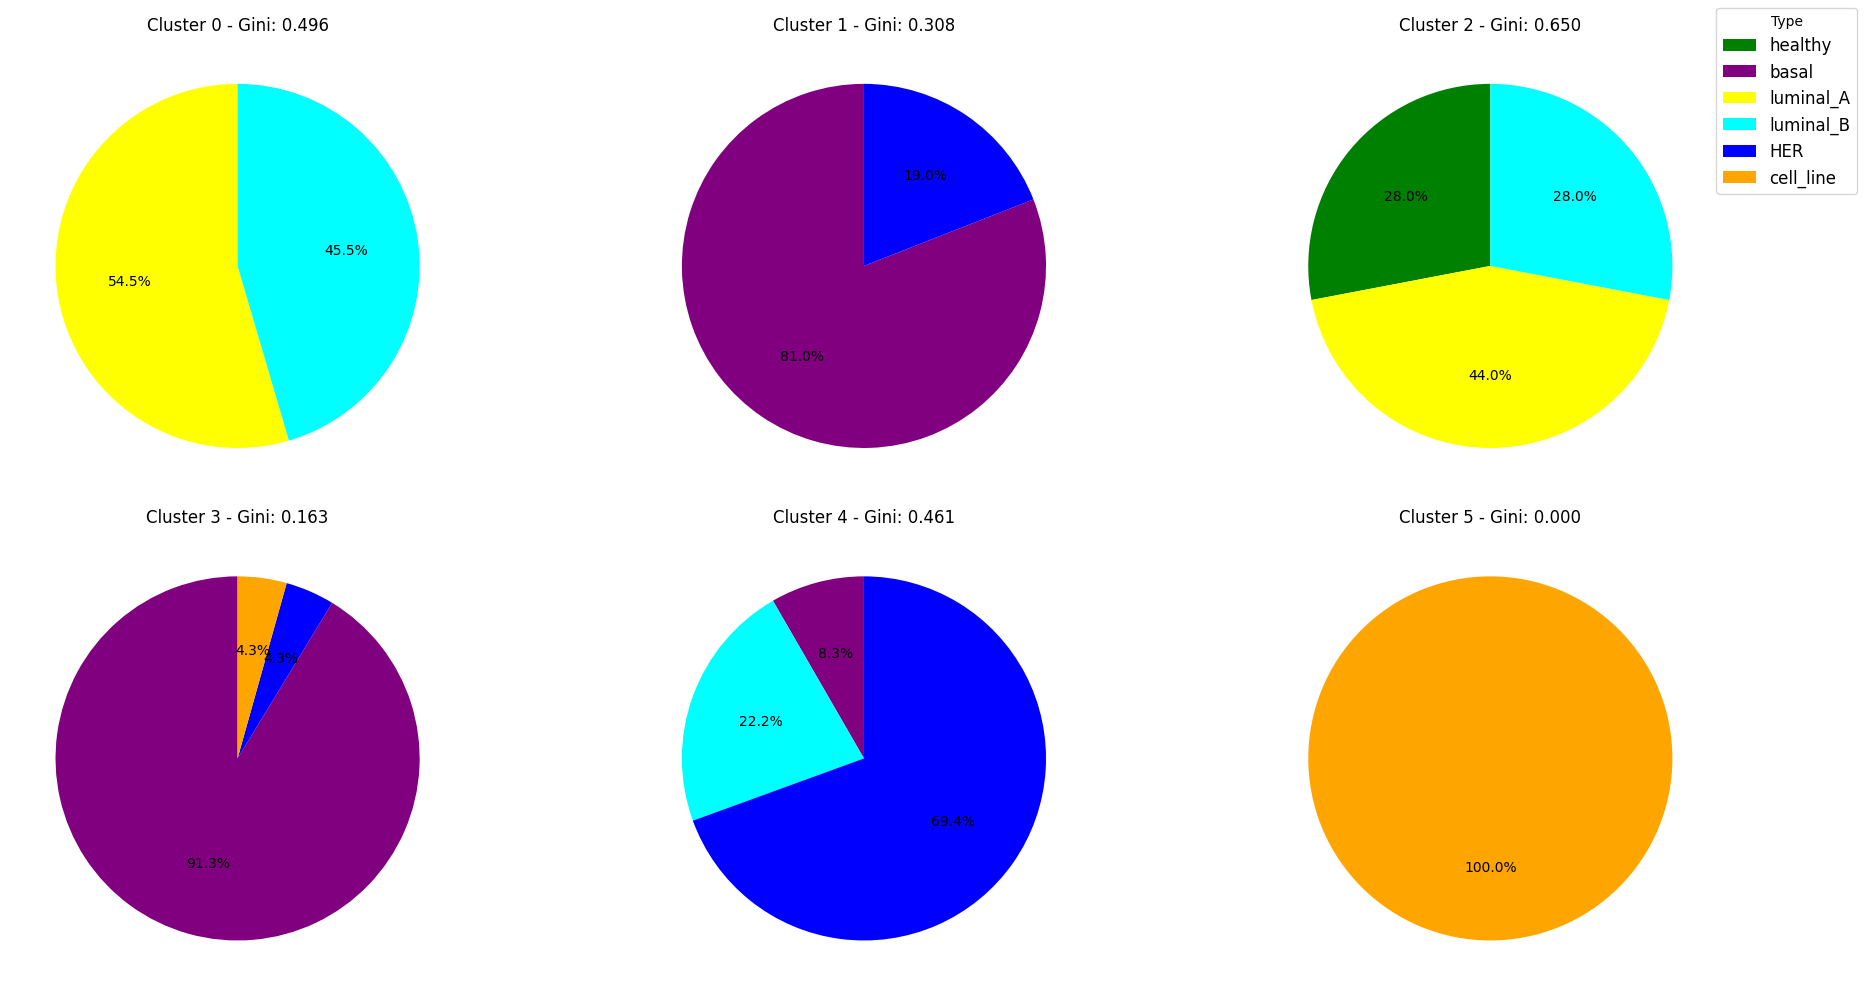

In [316]:
import matplotlib.pyplot as plt
import numpy as np

metadata['top10_kmeans'] = top10_kmeans.labels_

# Define the fixed colors for each type (example: 6 types)
type_colors = {
    'healthy': 'green',
    'basal': 'purple',
    'luminal_A': 'yellow',
    'luminal_B': 'cyan',
    'HER': 'blue',
    'cell_line': 'orange'
}

# Function to calculate Gini Impurity
def gini_impurity(counts):
    total = sum(counts)
    if total == 0:
        return 0
    proportions = np.array(counts) / total
    return 1 - np.sum(proportions**2)

# Function to format percentages and hide 0% labels
def remove_zero_percentages(pct, allvalues):
    return f'{pct:.1f}%' if pct > 0 else ''  # Only show percentage if > 0%

# Set up a 2x3 grid for the pie charts (6 pie charts)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each unique KMeans cluster (assuming top10_kmeans column exists)
for i, cluster_label in enumerate(np.unique(metadata['top10_kmeans'])):
    # Select the subset of data for this cluster
    cluster_data = metadata[metadata['top10_kmeans'] == cluster_label]

    # Count the occurrences of each 'type' within the current cluster
    type_counts = cluster_data['type'].value_counts()

    # Ensure that all types are represented, even those with a count of 0
    full_type_counts = {type_: 0 for type_ in type_colors}  # Initialize all types with 0
    full_type_counts.update(type_counts.to_dict())  # Update with actual counts

    # Sort types based on the predefined order (to keep colors consistent)
    sorted_types = list(type_colors.keys())
    sorted_counts = [full_type_counts[type_] for type_ in sorted_types]
    chart_colors = [type_colors[type_] for type_ in sorted_types]

    # Calculate Gini impurity for this cluster
    gini = gini_impurity(sorted_counts)

    # Create a pie chart for the distribution of 'type' within this cluster
    axes[i].pie(sorted_counts,
                autopct=lambda pct: remove_zero_percentages(pct, sorted_counts),
                startangle=90, colors=chart_colors)
    axes[i].set_title(f"Cluster {cluster_label} - Gini: {gini:.3f}")

# Create a single legend for all pie charts outside the plot
fig.legend(labels=type_colors.keys(), loc='upper right', title="Type", fontsize=12)

# Adjust layout to avoid overlapping text and ensure proper spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("top10_kmeans_pie_charts_combined_with_gini.png", bbox_inches='tight')

# Show the figure (optional)
plt.show()


C:\Users\itani\AppData\Local\Temp\ipykernel_38072\2585310202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['top10_kmeans'] = top10_kmeans.labels_


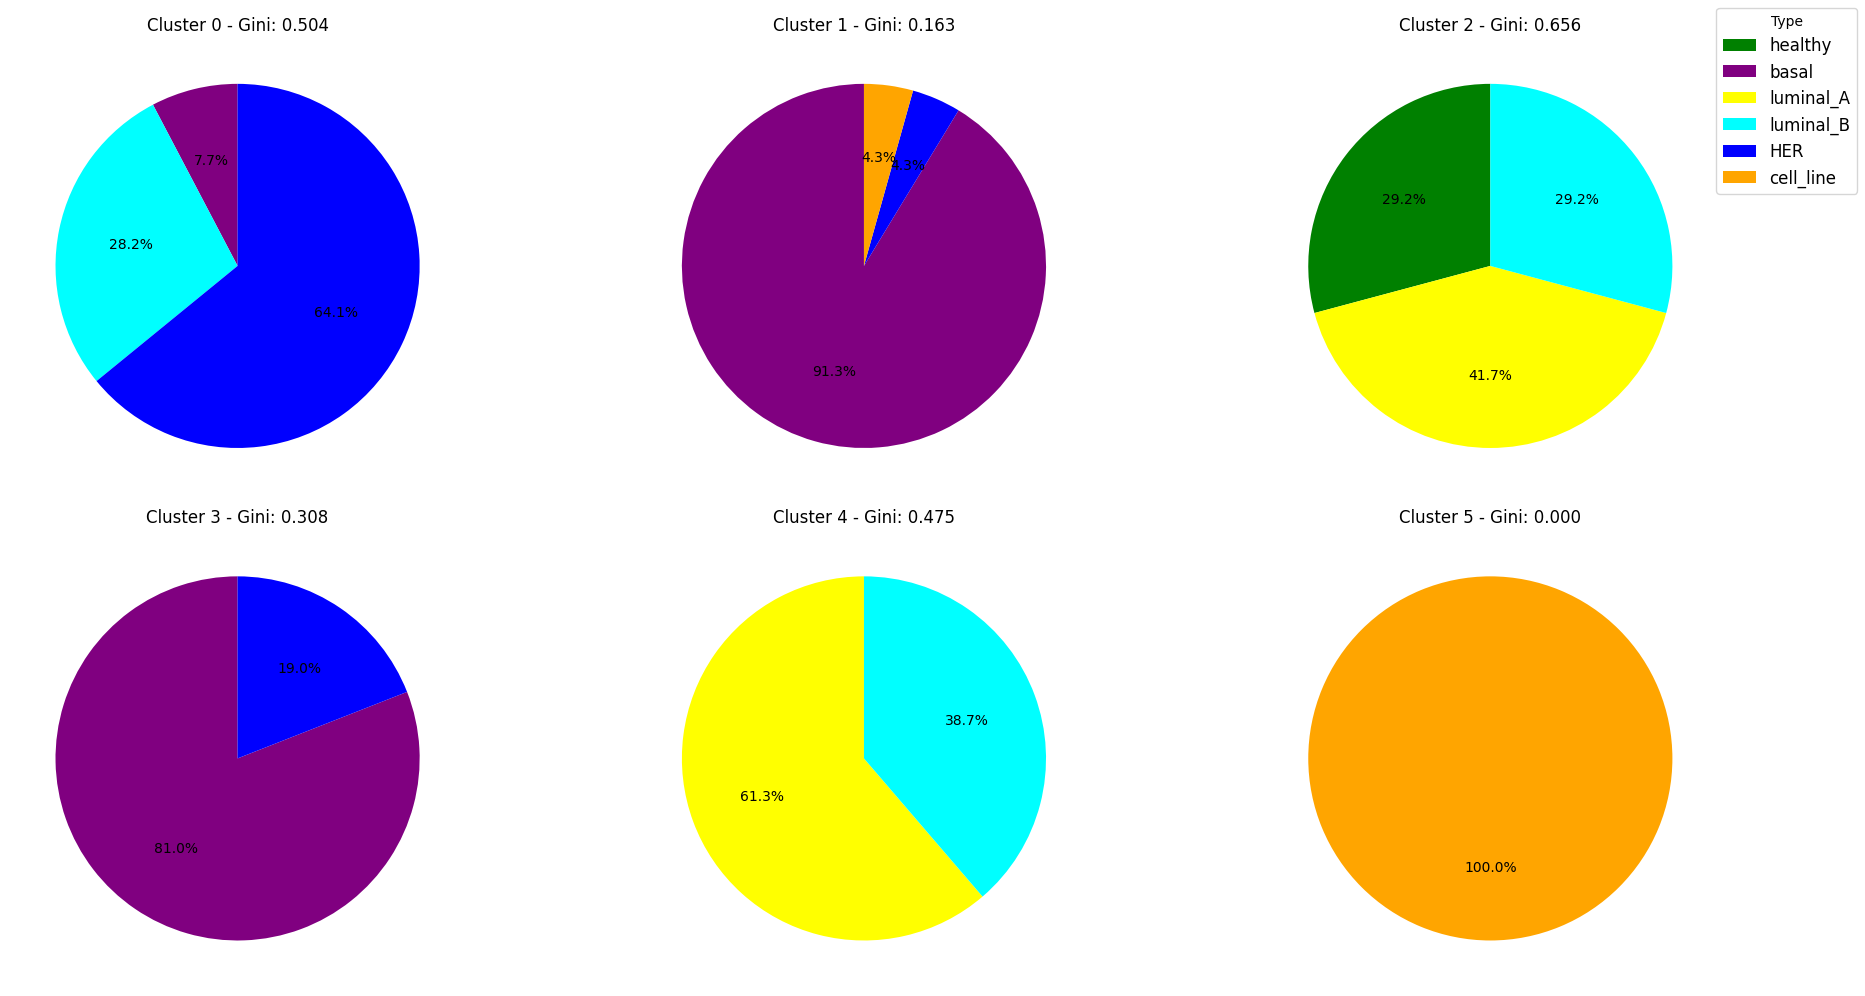

In [235]:
import matplotlib.pyplot as plt
import numpy as np

metadata['top10_kmeans'] = top10_kmeans.labels_

# Define the fixed colors for each type (example: 6 types)
type_colors = {
    'healthy': 'green',
    'basal': 'purple',
    'luminal_A': 'yellow',
    'luminal_B': 'cyan',
    'HER': 'blue',
    'cell_line': 'orange'
}

# Function to calculate Gini Impurity
def gini_impurity(counts):
    total = sum(counts)
    if total == 0:
        return 0
    proportions = np.array(counts) / total
    return 1 - np.sum(proportions**2)

# Function to format percentages and hide 0% labels
def remove_zero_percentages(pct, allvalues):
    return f'{pct:.1f}%' if pct > 0 else ''  # Only show percentage if > 0%

# Set up a 2x3 grid for the pie charts (6 pie charts)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each unique KMeans cluster (assuming kmeans_label column exists)
for i, cluster_label in enumerate(np.unique(metadata['top10_kmeans'])):
    # Select the subset of data for this cluster
    cluster_data = metadata[metadata['top10_kmeans'] == cluster_label]

    # Count the occurrences of each 'type' within the current cluster
    type_counts = cluster_data['type'].value_counts()

    # Ensure that all types are represented, even those with a count of 0
    full_type_counts = {type_: 0 for type_ in type_colors}  # Initialize all types with 0
    full_type_counts.update(type_counts.to_dict())  # Update with actual counts

    # Sort types based on the predefined order (to keep colors consistent)
    sorted_types = list(type_colors.keys())
    sorted_counts = [full_type_counts[type_] for type_ in sorted_types]
    chart_colors = [type_colors[type_] for type_ in sorted_types]

    # Calculate Gini impurity for this cluster
    gini = gini_impurity(sorted_counts)

    # Create a pie chart for the distribution of 'type' within this cluster without 0% percentages
    axes[i].pie(sorted_counts,
                autopct=lambda pct: remove_zero_percentages(pct, sorted_counts),
                startangle=90, colors=chart_colors)
    axes[i].set_title(f"Cluster {cluster_label} - Gini: {gini:.3f}")

# Create a single legend for all pie charts outside the plot
fig.legend(labels=type_colors.keys(), loc='upper right', title="Type", fontsize=12)

# Adjust layout to avoid overlapping text and ensure proper spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("top10_kmeans_pie_charts_combined_with_gini.png", bbox_inches='tight')

# Show the figure (optional)
plt.show()


In [231]:
top_10_genes_data = raw_data[top_10_genes['Gene']]

In [233]:
top_10_genes_data.head().to_csv("data_sample.csv")